<a href="https://colab.research.google.com/github/gumballH2Oson/loud-mawt-works/blob/main/Neural_networkclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Createing data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#make 1000 examples

n_samples = 1000

# Create circles

X, y= make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:

# Check out the features
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:

# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

lets visualize our data


In [ ]:


# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


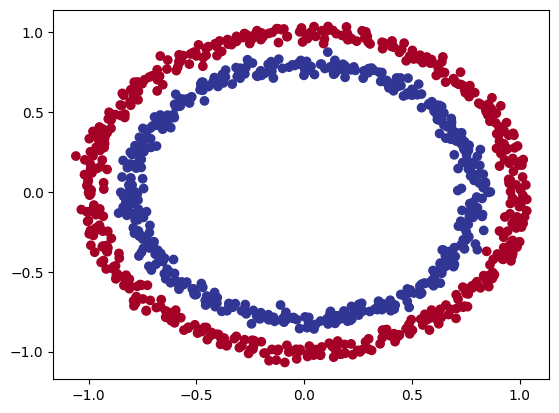

In [ ]:

# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


## input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## steps in modeling with tensor flow


In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])


model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.0412 - accuracy: 0.4780
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 1.3530 - accuracy: 0.4670
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7136 - accuracy: 0.4910
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4980


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 904us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

What if we added an extra layer and trained for a little longer?

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [ ]:

# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 957us/step - loss: 0.6934 - accuracy: 0.5000


[0.693408191204071, 0.5]

## Improving our model

In [ ]:

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.8478 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4432 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7150 - accuracy: 0.4370
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4480
Epoch 11/

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


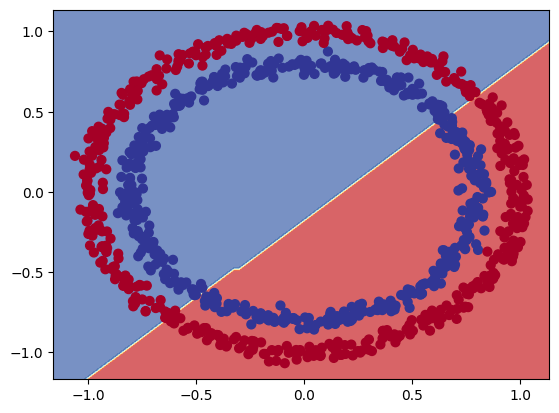

In [ ]:

# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [ ]:

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.8411 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.0130 - accuracy: 0.4720
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.5916 - accuracy: 0.4660
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 3.2616 - accuracy: 0.4830
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7875 - accuracy: 0.4940


In [ ]:

# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 945us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [ ]:

# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 955us/step - loss: 0.6937 - accuracy: 0.5000


[0.6937288045883179, 0.5]

In [ ]:

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 2.7043 - accuracy: 0.4650
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4920
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.4450
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.5080
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.5170
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4700
Epoch 11/

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 758us/step
doing binary classifcation...


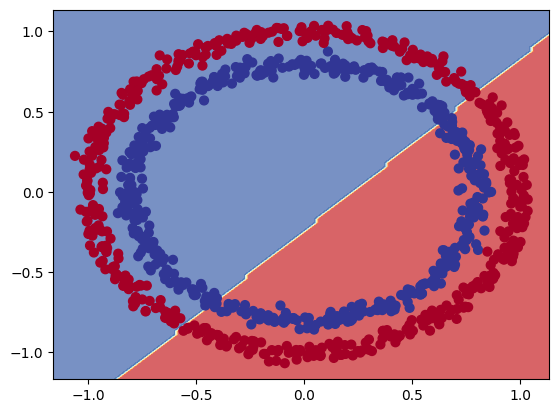

In [ ]:

# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)


In [ ]:


# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 10ms/step - loss: 390.5023 - mae: 390.5023
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 295.6054 - mae: 295.6054
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 203.9398 - mae: 203.9398
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 108.3726 - mae: 108.3726
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 47.6594 - mae: 47.6594
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 75.7715 - mae: 75.7715
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 66.7774 - mae: 66.7774
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 44.5005 - mae: 44.5005
Epoch 9/100
5/5 [==============================] - 0s 10ms/step - loss: 48.7280 - mae: 48.7280
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.4395 - mae: 43.4395
Epoch 11/100
5/5 [==============================]

In [ ]:
#setup random seed

tf.random.set_seed(42)

#create model

model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

#fit the model

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 501.5004 - mae: 501.5004
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 382.3693 - mae: 382.3693
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 268.1265 - mae: 268.1265
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 149.9957 - mae: 149.9957
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 52.8361 - mae: 52.8361
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 85.6067 - mae: 85.6067
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 82.3094 - mae: 82.3094
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 50.0925 - mae: 50.0925
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 50.3988 - mae: 50.3988
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 47.8271 - mae: 47.8271
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 5ms/step


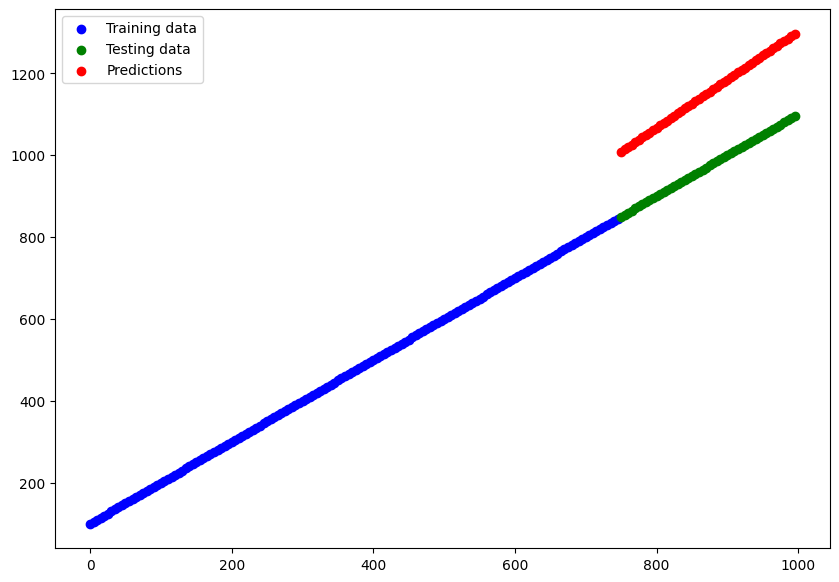

In [ ]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();



## The missing piece non-linearity

In [ ]:

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2329 - accuracy: 0.4580
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1346 - accuracy: 0.4650
Epoch 3/100
32/32 [==============================] - 0s 970us/step - loss: 4.0208 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9068 - accuracy: 0.4680
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7806 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6061 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4555 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1835 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.0077 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 2.7214 - accuracy: 0.4730
Epoch 1

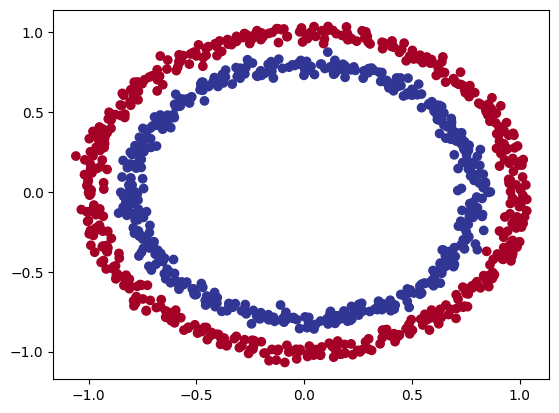

In [ ]:
#check our data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 767us/step
doing binary classifcation...


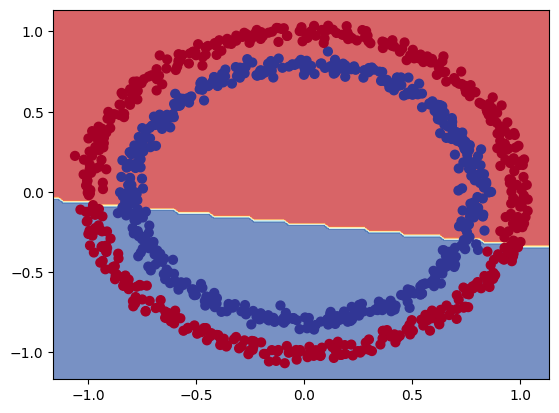

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the activation parameter in on of our layers.

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 1.8620 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4446 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 983us/step - loss: 1.3417 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 965us/step - loss: 1.2702 - accuracy: 0.4980
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2146 - accuracy: 0.4670
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1697 - accuracy: 0.4330
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1350 - accuracy: 0.4140
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1049 - accuracy: 0.4200
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0796 - accuracy: 0.4450
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0562 - accuracy: 0.4530
Epoch

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 3.9294 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 2.1115 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2738 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1961 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1375 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0876 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0456 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0088 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9782 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9512 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 728us/step
doing binary classifcation...


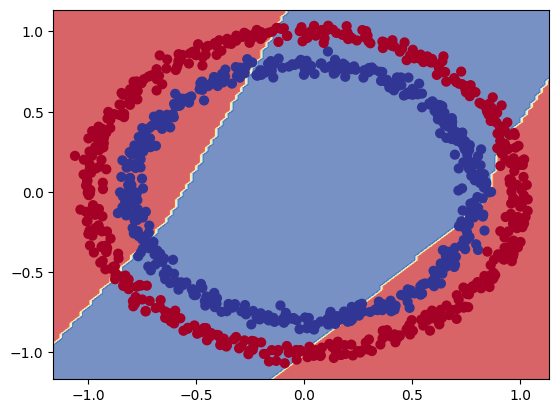

In [ ]:

# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)


In [ ]:

# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.9430


[0.3482866883277893, 0.9430000185966492]

313/313 [==============================] - 0s 763us/step
doing binary classifcation...


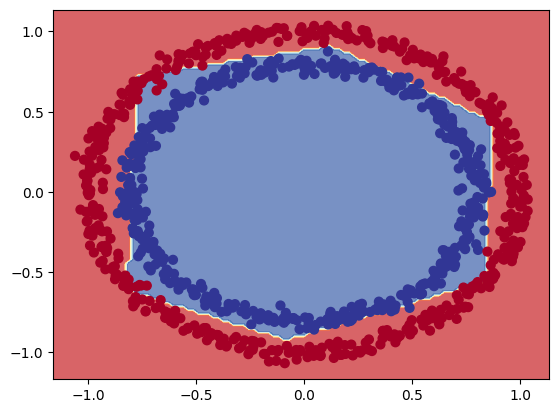

In [ ]:


# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)


🔑 Note: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

In [ ]:

# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at tf.keras.activations.sigmoid.

In [ ]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

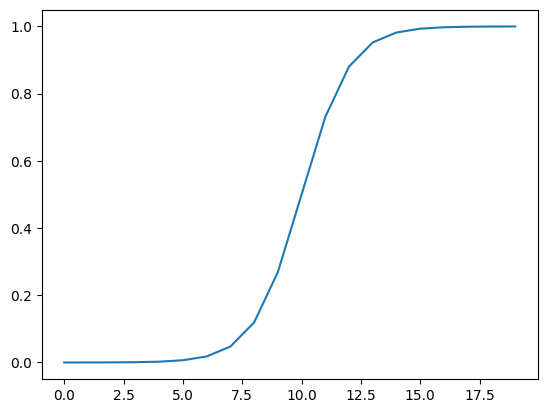

In [ ]:

# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

In [ ]:
#lets recreate relu function

def relu(x):
  return tf.maximum(0, x)

  #pass our toy tensor
  relu(A)

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

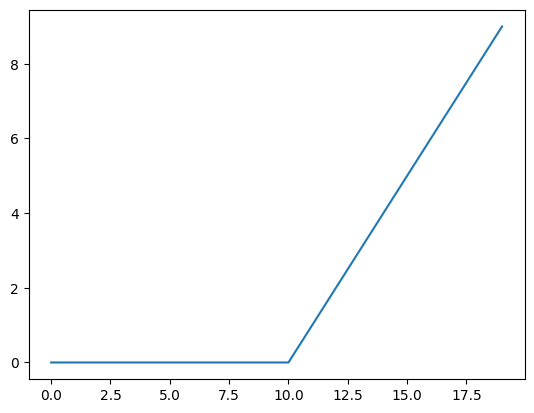

In [ ]:

# Plot ReLU-modified tensor
plt.plot(relu(A));

Another non-straight line!

Well, how about TensorFlow's linear activation function?

In [ ]:


# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:

# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our data

In [ ]:

# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [ ]:
#lets recreate a model to fit and evaluate

tf.random.set_seed(42)

model_8= tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

#compile

model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

#fit

history= model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7447 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7325 - accuracy: 0.4938
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7244 - accuracy: 0.4825
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7183 - accuracy: 0.4787
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7142 - accuracy: 0.4775
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.4675
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7088 - accuracy: 0.4625
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7071 - accuracy: 0.4575
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7055 - accuracy: 0.4575
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.4487
Epoch 11/

In [ ]:
#evaluate

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.5750


[0.6377801299095154, 0.574999988079071]

313/313 [==============================] - 0s 728us/step
doing binary classifcation...
313/313 [==============================] - 0s 913us/step
doing binary classifcation...


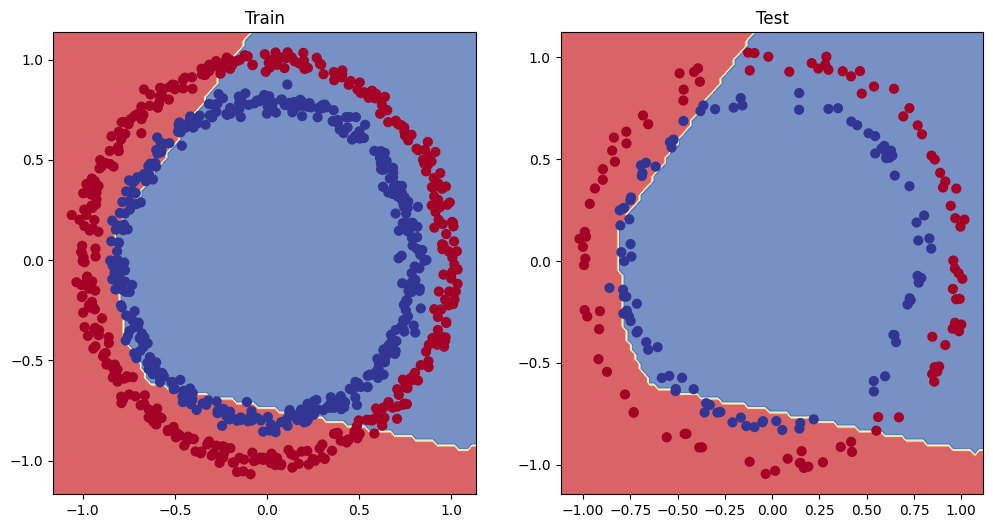

In [ ]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()


### plot loss curve

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.744712,0.49875
1,0.732486,0.49375
2,0.724360,0.48250
3,0.718263,0.47875
4,0.714219,0.47750
...,...,...
95,0.624634,0.63000
96,0.623305,0.63625
97,0.621458,0.65375
98,0.619932,0.64500


<Axes: >

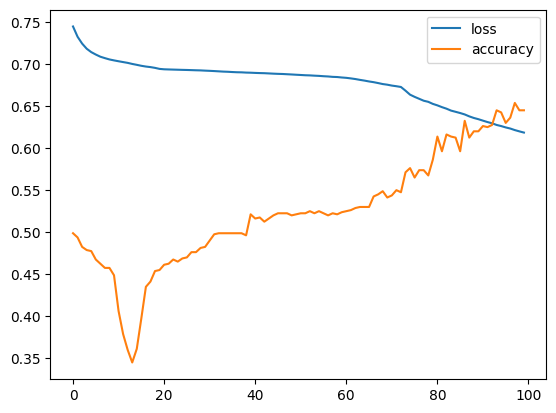

In [ ]:
pd.DataFrame(history.history).plot()

## Finding the best learning rate

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.4825 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.4837 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.4825 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.4825 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.4812 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.4825 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.4825 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.4812 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

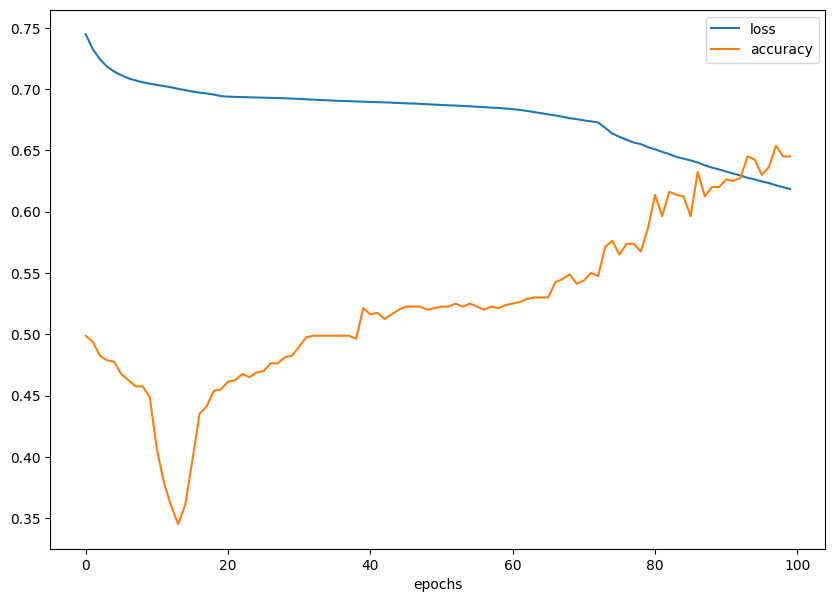

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");
# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])


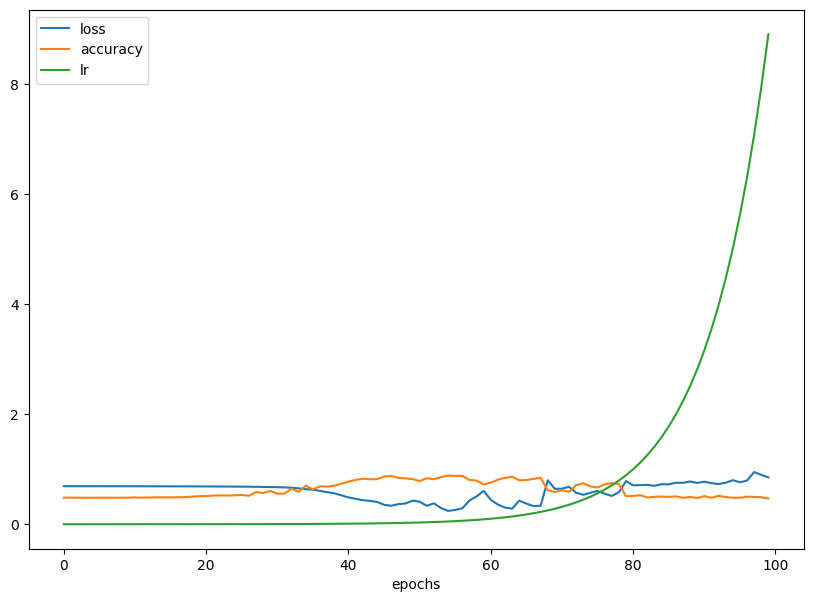

In [ ]:

# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

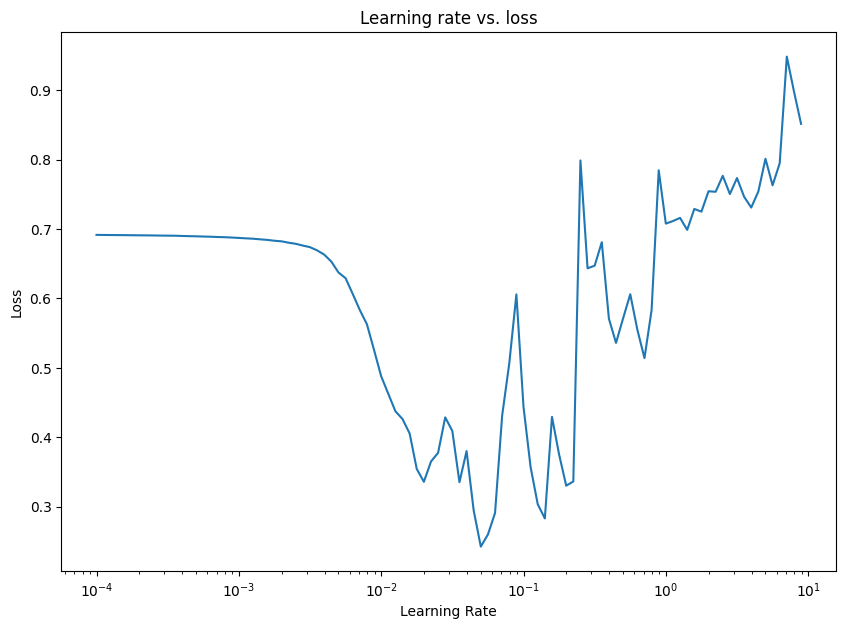

In [ ]:

# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:

# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:


# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6955 - accuracy: 0.4975
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5375
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.6062
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6625
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.6650
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6018 - accuracy: 0.6988
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.7262
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5271 - accuracy: 0.7588
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7862
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.8275
Epoch 11/20
25/25 [

In [ ]:

# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.9600


[0.19045354425907135, 0.9599999785423279]

313/313 [==============================] - 0s 727us/step
doing binary classifcation...
313/313 [==============================] - 0s 754us/step
doing binary classifcation...


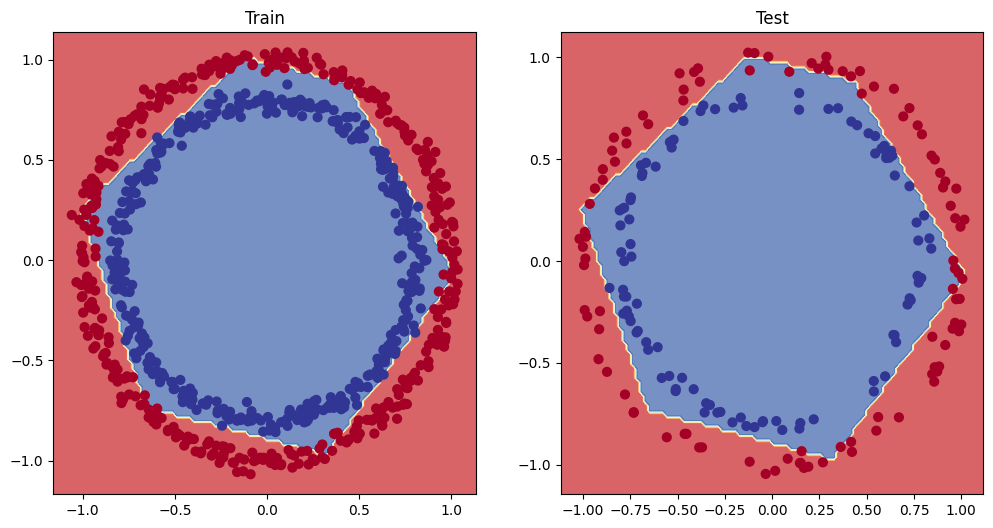

In [ ]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## more classification metods

* Acuraccy
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification report

In [ ]:
#check model accuracy

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'model loss{loss}')
print(f'model accuracy{(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9600
model loss0.19045354425907135
model accuracy96.00%


## Confusion matrix

In [ ]:
#from sklearn.metrics import confusion_matrix

#y_preds= model_10.predict(X_test)

#confusion_matrix(y_test, y_preds)

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (9.8526537e-01), they're in a form called prediction probabilities.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how likely they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (y_test) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using tf.round().

In [ ]:
#to solve the error above # Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
#Create a confusion matrix

confusion_matrix(y_test, tf.round(y_preds))

array([[93,  8],
       [ 0, 99]])

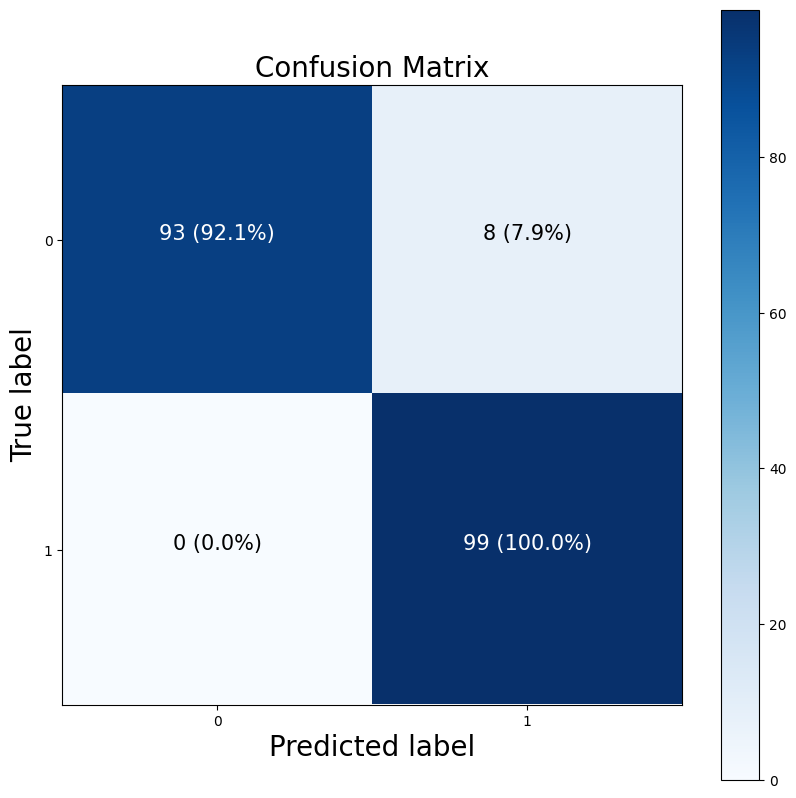

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, this is known as multiclass classification.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:

# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#Check the shape of a single example

train_data[0].shape, train_labels[0].shape

((28, 28), ())

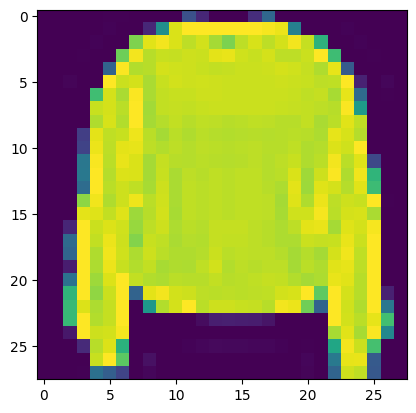

In [ ]:
#plot a single sample

import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
#Check out sample label

train_labels[7]

2

In [ ]:
# create a small list so we index unto our training labels so they are readable

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Coat')

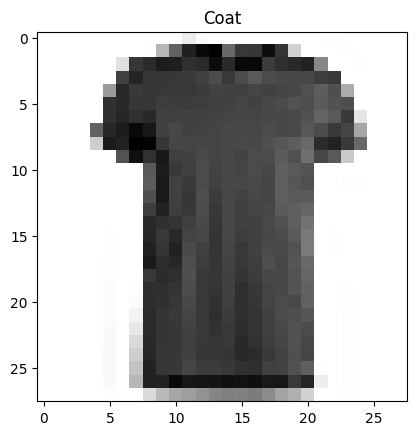

In [ ]:
#plot an example inage and its label

index_of_choice= 2000
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

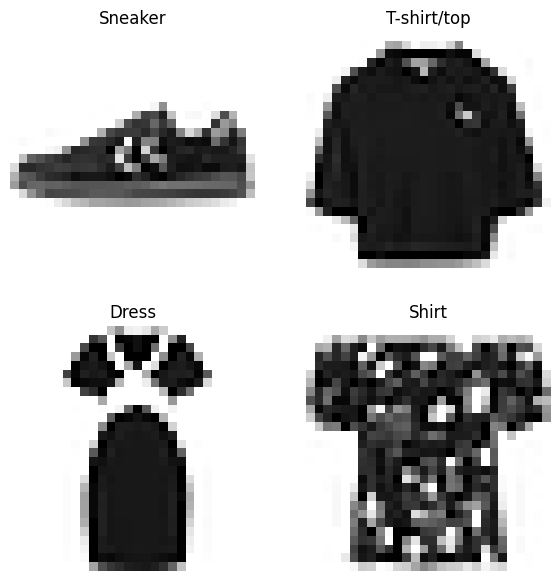

In [ ]:
#-plot multiple random images or fashion mnist

import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax= plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## building multi-class classification model

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).
* The output shape will have to be 10 because we need our model to predict for 10 different classes.
We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4081 - accuracy: 0.1169 - val_loss: 2.2359 - val_accuracy: 0.1324
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1264 - accuracy: 0.1718 - val_loss: 1.7639 - val_accuracy: 0.2561
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6190 - accuracy: 0.3309 - val_loss: 1.5299 - val_accuracy: 0.3850
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4510 - accuracy: 0.3982 - val_loss: 1.4067 - val_accuracy: 0.4096
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3854 - accuracy: 0.4201 - val_loss: 1.3557 - val_accuracy: 0.4237
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3453 - accuracy: 0.4302 - val_loss: 1.3125 - val_accuracy: 0.4476
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3212 - accuracy: 0.4353 - val_loss: 1.3187 - val_accuracy:

In [ ]:

# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 4)                 3140      
                                                                 
 dense_41 (Dense)            (None, 4)                 20        
                                                                 
 dense_42 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()


(0, 255)

Nueral networks prefer data to be scaled(or normalized), this means the like to have numbers in the tensors they try to find patterns between 0 and 1

In [ ]:

# Divide train and test images by the maximum value (normalize it)

train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#check min and max value of the scaled trained data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is between 0 and 1. Let's see what happens when we model it.

# We'll use the same model as before (model_11) except this time the data will be normalized.



# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2324 - accuracy: 0.1811 - val_loss: 1.8679 - val_accuracy: 0.2402
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7407 - accuracy: 0.2806 - val_loss: 1.6775 - val_accuracy: 0.2797
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6241 - accuracy: 0.3118 - val_loss: 1.5728 - val_accuracy: 0.3392
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5370 - accuracy: 0.3614 - val_loss: 1.5144 - val_accuracy: 0.3641
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4833 - accuracy: 0.3706 - val_loss: 1.4728 - val_accuracy: 0.3863
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4512 - accuracy: 0.3747 - val_loss: 1.4506 - val_accuracy: 0.3662
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4393 - accuracy: 0.3764 - val_loss: 1.4423 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

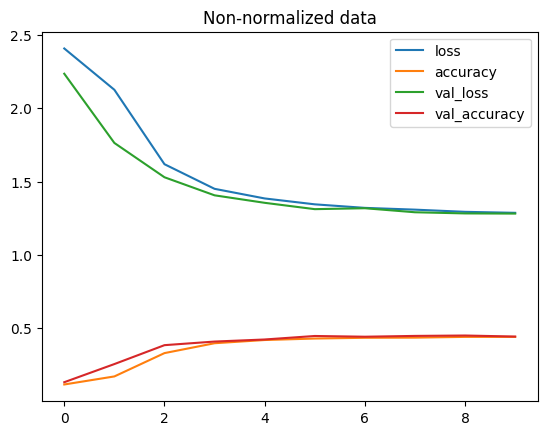

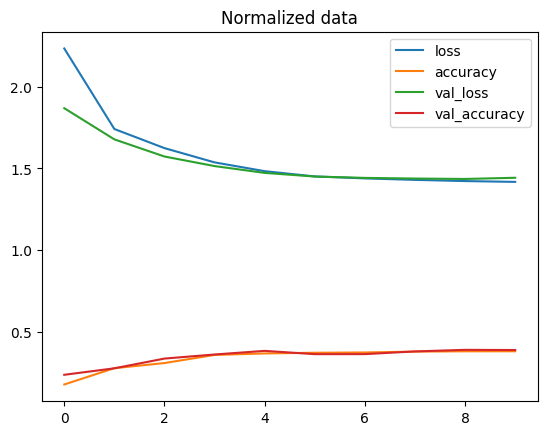

In [ ]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

## finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)


model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),


])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs = 40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4255 - accuracy: 0.4986 - val_loss: 1.0484 - val_accuracy: 0.6393 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8652 - accuracy: 0.6982 - val_loss: 0.7633 - val_accuracy: 0.7454 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6965 - accuracy: 0.7615 - val_loss: 0.7040 - val_accuracy: 0.7509 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6482 - accuracy: 0.7716 - val_loss: 0.6604 - val_accuracy: 0.7651 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6285 - accuracy: 0.7767 - val_loss: 0.6665 - val_accuracy: 0.7654 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6133 - accuracy: 0.7822 - val_loss: 0.6776 - val_accuracy: 0.7590 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

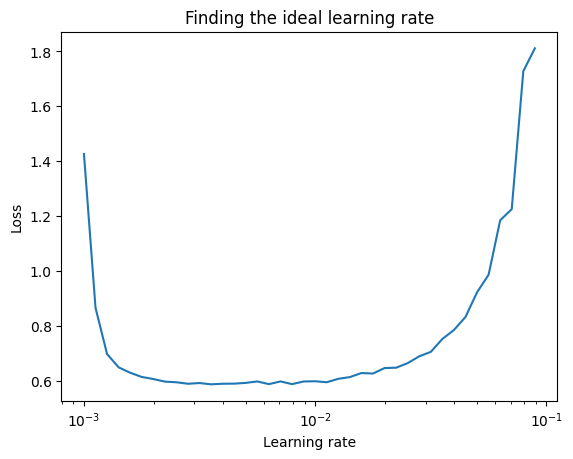

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))


Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 2.4483 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3030 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

In [ ]:
#create confusion matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
#make predictions

y_probs = model_14.predict(test_data_norm)

#view first 5 preds

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[0.10051846, 0.09990153, 0.09993467, 0.09959822, 0.0987547 ,
        0.10201307, 0.09993794, 0.10019223, 0.10045668, 0.09869245],
       [0.10051846, 0.09990153, 0.09993467, 0.09959822, 0.0987547 ,
        0.10201307, 0.09993794, 0.10019223, 0.10045668, 0.09869245],
       [0.10051846, 0.09990153, 0.09993467, 0.09959822, 0.0987547 ,
        0.10201307, 0.09993794, 0.10019223, 0.10045668, 0.09869245],
       [0.10051846, 0.09990153, 0.09993467, 0.09959822, 0.0987547 ,
        0.10201307, 0.09993794, 0.10019223, 0.10045668, 0.09869245],
       [0.10051846, 0.09990153, 0.09993467, 0.09959822, 0.0987547 ,
        0.10201307, 0.09993794, 0.10019223, 0.10045668, 0.09869245]],
      dtype=float32)

In [ ]:


# See the predicted class number and label for the first example
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([0.10051846, 0.09990153, 0.09993467, 0.09959822, 0.0987547 ,
        0.10201307, 0.09993794, 0.10019223, 0.10045668, 0.09869245],
       dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 'Sandal')

In [ ]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(5, 'Sandal')

# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red


1/1 [==============================] - 0s 16ms/step


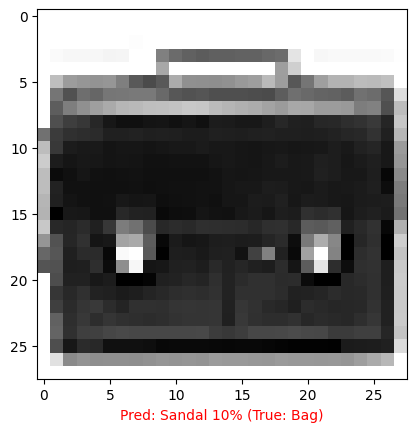

In [ ]:

# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images= test_data_norm,# =make predictions on data your model is trained on
                  true_labels= test_labels,
                  classes= class_names)

## what is our model learning

In [ ]:

# Find the layers of our most recent model
model_14.layers


In [ ]:

# Extract a particular layer
model_14.layers[1]

In [ ]:

# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.08189002, -0.08148338,  0.07466908,  0.04348375],
        [-0.04696619, -0.0193097 , -0.02156365,  0.01356191],
        [ 0.03299065, -0.06118739, -0.08149882,  0.01880325],
        ...,
        [ 0.02021612,  0.00502927,  0.07473172, -0.03257434],
        [-0.06806432, -0.06167419,  0.07571822, -0.00869739],
        [ 0.05575313,  0.01174375, -0.02603229,  0.01116632]],
       dtype=float32),
 (784, 4))

In [ ]:

# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape


(array([-0.01903488, -0.01981252, -0.0148635 , -0.03135803], dtype=float32),
 (4,))

In [ ]:


# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_58 (Dense)            (None, 4)                 3140      
                                                                 
 dense_59 (Dense)            (None, 4)                 20        
                                                                 
 dense_60 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


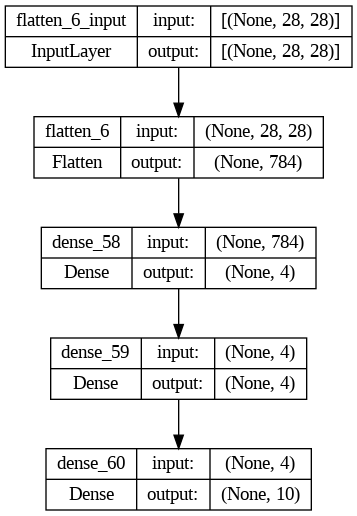

In [ ]:

from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)